### prepare

In [1]:
# import
# pip3 install -U scikit-learn
# sudo pacman -S python-scikit-learn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from google.colab import files
import tensorflow as tf
import math

# data
x_data = np.array([[0.67003],[0.64003],[0.61003],[0.58002],[0.55002],[0.52002],[0.49001],[0.46001],[0.43001],[0.40001],[0.37001],[0.34001],[0.31001],[0.28000]])
y_data = np.array([[0.72512],[0.73310],[0.72671],[0.72343],[0.71180],[0.69758],[0.68061],[0.65528],[0.62858],[0.59563],[0.55927],[0.51316],[0.45432],[0.38027]])
x_data = MinMaxScaler().fit_transform(x_data)
y_data = MinMaxScaler().fit_transform(y_data)

# shape
print("x shape is ", x_data.shape)
print("y shape is ", y_data.shape)

x shape is  (14, 1)
y shape is  (14, 1)


### show

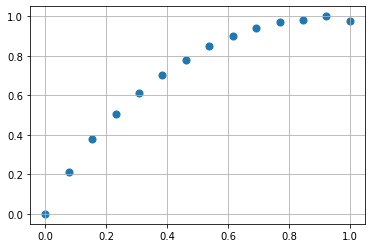

<Figure size 432x288 with 0 Axes>

In [2]:
# plot
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.grid()
plt.show()
plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

### model

In [3]:
# roberto
n_features = x_data.shape[1]
inputs  = keras.Input(shape=(n_features,))
dense   = keras.layers.Dense(64, activation="relu")
x       = dense(inputs)
x       = keras.layers.Dense(64, activation="relu")(x)
x       = keras.layers.Dense(16, activation="relu")(x)
outputs = keras.layers.Dense(2)(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 5,362
Trainable params: 5,362
Non-trainable params: 0
_________________________________________________________________


2022-08-20 15:02:09.533301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-20 15:02:09.536069: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### train

In [4]:
# 5,64
model.fit(x_data, y_data, batch_size=64, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 543ms/step - loss: 0.5969
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 0.5650
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 0.5353
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 0.5076
Epoch 5/5
1/1 [==============================] - 0s 15ms/step - loss: 0.4870


### predict

1/1 [==============================] - 0s 79ms/step


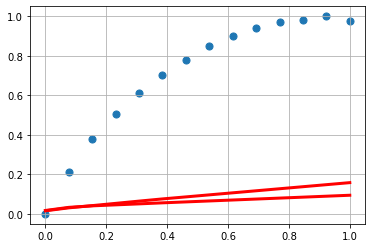

In [5]:
# from input
y_predicted = model.predict(x_data)

# plot
plt.scatter(x_data[::1], y_data[::1], s=50)
plt.plot(x_data, y_predicted, 'r', linewidth=3)
plt.grid()
#plt.show()
plt.savefig('training.png', dpi=300)
#files.download("training.png") 

### video


In [6]:
#for x in range(100):
#  # One epoch
#  model.fit( x_data, y_data, epochs=1, verbose=1)
#
#  # Compute the output 
#  y_predicted = model.predict(x_data)
#
#  # Display the result
#  plt.scatter(x_data[::1], y_data[::1], s=2)
#  plt.plot(x_data, y_predicted, 'r', linewidth=4)
#  plt.grid()
#  plt.ylim(top=1.2)  # adjust the top leaving bottom unchanged
#  plt.ylim(bottom=-1.2)  
#  #plt.show()
#  plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
#  #files.download('training-' + str(x) +'-epochs.png') 
#  plt.clf()

